In [1]:
# import libraries

import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from utils import *
from network import *

%matplotlib inline
np.random.seed(1)

In [2]:
# loading training and test sets
train_orig = pd.read_csv('../input/original_mnist/train.csv')
test = pd.read_csv('../input/original_mnist/test.csv')
#test_kaggle = pd.read_csv('../input/kaggle_inputs/test.csv')

In [3]:
# display the training set
train_orig

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# displaying the test set
test

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# randomly shuffle training data and create the dev set

train_shuffled = train_orig.iloc[np.random.permutation(train_orig.shape[0])]
train = train_shuffled.iloc[:50000, :]
dev = train_shuffled.iloc[50000:, :]

In [6]:
n = train.shape[1] - 1  # number of features
m_train = train.shape[0]  # number of training examples
m_dev = dev.shape[0]  # number of examples in dev set
m_test = test.shape[0]  # number of examples in test set
# m_test_kaggle = test_kaggle.shape[0]  # number of examples in kaggle test set
print(n, m_train, m_dev, m_test)

784 50000 10000 10000


In [7]:
# Separate features from labels

X_train = np.array(train.loc[:, 'pixel0':].T).reshape(n, m_train)
Y_train = np.array(train['label'].T).reshape(1, m_train)
X_dev = np.array(dev.loc[:, 'pixel0':].T).reshape(n, m_dev)
Y_dev = np.array(dev['label'].T).reshape(1, m_dev)
X_test = np.array(test.loc[:, 'pixel0':].T).reshape(n, m_test)
Y_test = np.array(test['label'].T).reshape(1, m_test)
#X_test_kaggle = np.array(test_kaggle.T).reshape(n, m_test_kaggle)

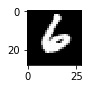

In [8]:
# visualize images (change index to visualize other images)

index = 15247
h, w = (28, 28)
plt.figure(figsize=(1, 1))
data = np.array(X_train[:, index].reshape(h, w), dtype=np.uint8)
img = Image.fromarray(data, mode='L')  # mode='L' for 8-bit pixels, black and white
plt.imshow(img, cmap='gray')

In [9]:
# normalize the X values

X_train = X_train / 255.0
X_dev = X_dev / 255.0
X_test = X_test / 255.0
#X_test_kaggle = X_test_kaggle / 255.0

In [10]:
# convert Y_train to equivalent one_hot_encoding

Y_train_one_hot = one_hot_encoding(Y_train, 10)  # num_of_output_units = 10
print(Y_train_one_hot.shape)

(10, 50000)


In [23]:
# create a neural network

nn = network([X_train.shape[0], 30, 10], X_train, Y_train_one_hot)

In [24]:
# gradient descent

nn.nn_model(learning_rate=1, num_epochs=1000, mini_batch_size=m_train, lmbda=1, optimizer='adam')

/home/shubham/MachineLearning/MNIST/src/network.py:315: RuntimeWarning: divide by zero encountered in true_divide
  self.V_dW_corr[l] = self.V_dW[l] / (1 - beta1 ** num_epoch)
/home/shubham/MachineLearning/MNIST/src/network.py:316: RuntimeWarning: divide by zero encountered in true_divide
  self.V_db_corr[l] = self.V_db[l] / (1 - beta1 ** num_epoch)
/home/shubham/MachineLearning/MNIST/src/network.py:317: RuntimeWarning: divide by zero encountered in true_divide
  self.S_dW_corr[l] = self.S_dW[l] / (1 - beta2 ** num_epoch)
/home/shubham/MachineLearning/MNIST/src/network.py:318: RuntimeWarning: divide by zero encountered in true_divide
  self.S_db_corr[l] = self.S_db[l] / (1 - beta2 ** num_epoch)
/home/shubham/MachineLearning/MNIST/src/network.py:321: RuntimeWarning: invalid value encountered in true_divide
  (np.sqrt(self.S_dW_corr[l]) + epsilon))
/home/shubham/MachineLearning/MNIST/src/network.py:324: RuntimeWarning: invalid value encountered in true_divide
  (np.sqrt(self.S_db_corr[l]

Epoch 0 : 2.30218824047


/home/shubham/MachineLearning/MNIST/src/utils.py:128: RuntimeWarning: invalid value encountered in greater
  relu_gradient = (Z > 0)


Epoch 1 : nan


KeyboardInterrupt: 

In [ ]:
# save parameters
nn.store_parameters()

In [ ]:
# load parameters
filename = '../output/2_hl_30_hu_each_1700_iter.npz'  # with .npz extension
nn.load_parameters(filename)

In [25]:
# prediction of labels

Y_hat_train_one_hot = nn.predict(X_train)
Y_hat_train = one_hot_decoding(Y_hat_train_one_hot)
Y_hat_dev_one_hot = nn.predict(X_dev)
Y_hat_dev = one_hot_decoding(Y_hat_dev_one_hot)
Y_hat_test_one_hot = nn.predict(X_test)
Y_hat_test = one_hot_decoding(Y_hat_test_one_hot)
#Y_hat_test_kaggle_one_hot = nn.predict(X_test_kaggle)
#Y_hat_test_kaggle = one_hot_decoding(Y_hat_test_kaggle_one_hot)

In [26]:
# print accuracy on the dev set

print('Training set accuracy :', score(Y_hat_train, Y_train) * 100, '%')
print('Dev set accuracy :', score(Y_hat_dev, Y_dev) * 100, '%')
print('Test set accuracy :', score(Y_hat_test, Y_test) * 100, '%')

Training set accuracy : 9.838 %
Dev set accuracy : 10.04 %
Test set accuracy : 9.8 %


In [ ]:
# generation of kaggle output file

generate_output_file(Y_hat_test_kaggle)